This is described by an equation of the form
$$
\frac1{t^2} \frac{d}{dt}\left(t^2 \frac{d\theta}{dt}\right) + \theta^n = 0
$$

In [5]:
from integrators import contact as ic
from integrators.common import rk4

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class LaneEmden:
    def __init__(self, n):
        self.n = n

    def f(self, t):
        return 2/t
    
    def V(self, q, t):
        return q**(self.n+1)/(self.n+1)
    
    def Vq(self, q, t):
        return q**self.n

In [8]:
err_q = lambda t: t**2/6

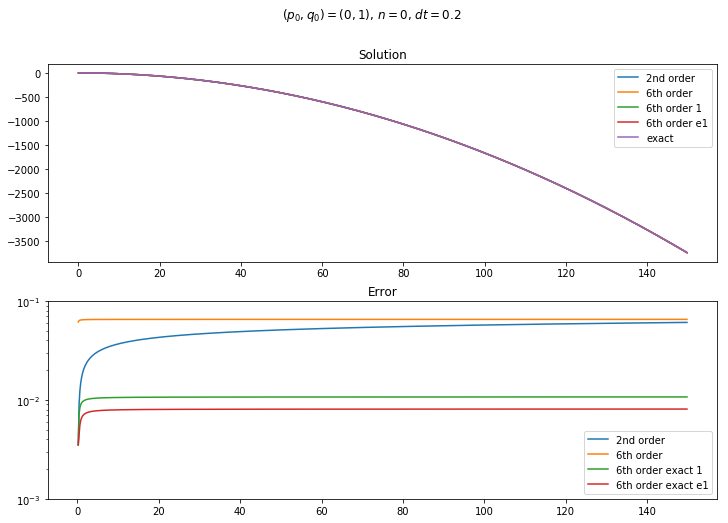

In [14]:
le = LaneEmden(0)
dt = 0.2
tf = 150

tspan = np.arange(0.0, tf, dt)

p0, q0 = (0,1)
exact = lambda t: 1-1/6*t**2

plt.figure(figsize=(12,8))
plt.suptitle(f"$(p_0,q_0)=({p0},{q0})$, $n={le.n}$, $dt={dt}$")

sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)
solm, _, _ = ic.integrate(ic.step6, le, tspan, p0, q0, 0.0)

sole, _, _ = ic.integrate(ic.step6e, le, tspan, p0, q0, 0.0)
# solb, _, _ = ic.integrate(ic.step6b, le, tspan, p0, q0, 0.0)
# solc, _, _ = ic.integrate(ic.step6c, le, tspan, p0, q0, 0.0)

p1, q1 = sol[:,0][1], sol[:,1][1]
solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

# solrk = rk4(le, (p0, q0), tspan)
# solsc, _, _ = ic.integrate(ic.variational_step, le, tspan, p0, q0, 0.0)

plt.subplot(211)
plt.title("Solution")
plt.plot(tspan, 
         sol[:,1],
         label="2nd order")
plt.plot(tspan,
         solm[:,1],
         label="6th order")
plt.plot(tspan[1:],
         solm1[:,1],
         label="6th order 1")
plt.plot(tspan[1:],
         sole1[:,1],
         label="6th order e1")
# plt.plot(tspan,
#          sole[:,1],
#          label="6th order exact")
# plt.plot(tspan,
#          solb[:,1],
#          label="6th order b")
# plt.plot(tspan,
#          solc[:,1],
#          label="6th order c")


#     plt.plot(tspan,
#              solsc[:,1],
#              label="V")
plt.plot(tspan, exact(tspan),
         label="exact")
plt.legend()

plt.subplot(212)
plt.title("Error")
plt.plot(tspan[1:], 
         abs(sol[:,1]-exact(tspan))[1:],
         label="2nd order")
plt.plot(tspan[1:],
         abs(solm[:,1]-exact(tspan))[1:],
         label="6th order")
plt.plot(tspan[1:],
         abs(solm1[:,1]-exact(tspan)[1:]),
         label="6th order exact 1")
plt.plot(tspan[1:],
         abs(sole1[:,1]-exact(tspan)[1:]),
         label="6th order exact e1")

# plt.plot(tspan[1:],
#          abs(sole[:,1]-exact(tspan))[1:],
#          label="6th order exact")
# plt.plot(tspan[1:],
#          abs(solb[:,1]-exact(tspan))[1:],
#          label="6th order b")
# plt.plot(tspan[1:],
#          abs(solc[:,1]-exact(tspan))[1:],
#          label="6th order c")
#     plt.plot(tspan,
#              solsc[:,1]-exact(tspan),
#              label="V")
plt.yscale("log")
plt.ylim(1e-3, 1e-1)
plt.legend()
plt.show()


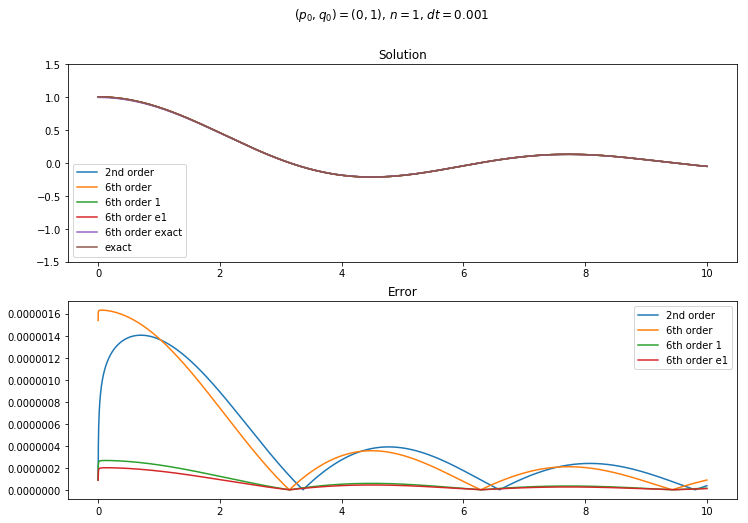

In [60]:
le = LaneEmden(1)
dt = 0.001
tf = 10

err_q = lambda t: 2*np.log(t + dt/2) - 3/(t+dt/2) + 6/dt - 2*np.log(dt/2) + dt**2/6

tspan = np.arange(0.0, tf, dt)

p0, q0 = (0,1)
exact = lambda tspan: [1.0 if t < np.finfo(float).eps else np.sin(t)/t for t in tspan]

plt.figure(figsize=(12,8))
plt.suptitle(f"$(p_0,q_0)=({p0},{q0})$, $n={le.n}$, $dt={dt}$")

sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)
solm, _, _ = ic.integrate(ic.step6, le, tspan, p0, q0, 0.0)

sole, _, _ = ic.integrate(ic.step6e, le, tspan, p0, q0, 0.0)
# solb, _, _ = ic.integrate(ic.step6b, le, tspan, p0, q0, 0.0)
# solc, _, _ = ic.integrate(ic.step6c, le, tspan, p0, q0, 0.0)

#pq, _, _ = ic.integrate(ic.step, le, np.arange(0.0,dt/10,dt/20), p0, q0, 0.0)
pq = sol
p1, q1 = pq[:,0][1], pq[:,1][1]
solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

# solrk = rk4(le, (p0, q0), tspan)
# solsc, _, _ = ic.integrate(ic.variational_step, le, tspan, p0, q0, 0.0)

plt.subplot(211)
plt.title("Solution")
plt.plot(tspan, 
         sol[:,1],
         label="2nd order")
plt.plot(tspan,
         solm[:,1],
         label="6th order")
plt.plot(tspan[1:],
         solm1[:,1],
         label="6th order 1")
plt.plot(tspan[1:],
         sole1[:,1],
         label="6th order e1")
plt.plot(tspan,
         sole[:,1],
         label="6th order exact")
# plt.plot(tspan,
#          solb[:,1],
#          label="6th order b")
# plt.plot(tspan,
#          solc[:,1],
#          label="6th order c")

#     plt.plot(tspan,
#              solsc[:,1],
#              label="V")
plt.ylim(-1.5,1.5)

plt.plot(tspan, exact(tspan),
         label="exact")
plt.legend()

plt.subplot(212)
# plt.title("Cumulative Error")

# plt.plot(tspan, err_q(tspan), label="Upper bound")
# plt.plot(tspan, 
#          np.cumsum(abs(sol[:,1]-exact(tspan))),
#          label="2nd order")
# plt.plot(tspan,
#          np.cumsum(abs(solm[:,1]-exact(tspan))),
#          label="6th order")
# plt.plot(tspan,
#          np.cumsum(abs(sole[:,1]-exact(tspan))),
#          label="6th order exact")

plt.title("Error")
plt.plot(tspan[1:], 
         abs(sol[:,1]-exact(tspan))[1:],
         label="2nd order")
plt.plot(tspan[1:],
         abs(solm[:,1]-exact(tspan))[1:],
         label="6th order")
plt.plot(tspan[1:],
         abs(solm1[:,1]-exact(tspan)[1:]),
         label="6th order 1")
plt.plot(tspan[1:],
         abs(sole1[:,1]-exact(tspan)[1:]),
         label="6th order e1")

# plt.plot(tspan[1:],
#          abs(sole[:,1]-exact(tspan))[1:],
#          label="6th order exact")
# plt.plot(tspan[1:],
#          abs(solb[:,1]-exact(tspan))[1:],
#          label="6th order b")
# plt.plot(tspan[1:],
#          abs(solc[:,1]-exact(tspan))[1:],
#          label="6th order c")
#     plt.plot(tspan,
#              solsc[:,1]-exact(tspan),
#              label="V")
#plt.yscale("log")
#plt.ylim(1e-6, 1e-1)
plt.legend()
plt.show()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
/Users/mseri/code/contact-integrators/integrators/contact.py:77: RuntimeWarning: invalid value encountered in double_scalars
  s += np.linalg.norm(p)**2*dt/4
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/Users/mseri/code/contact-integrators/integrators/contact.py:59: RuntimeWarning: invalid value encountered in double_scalars
  q += p*dt/2.


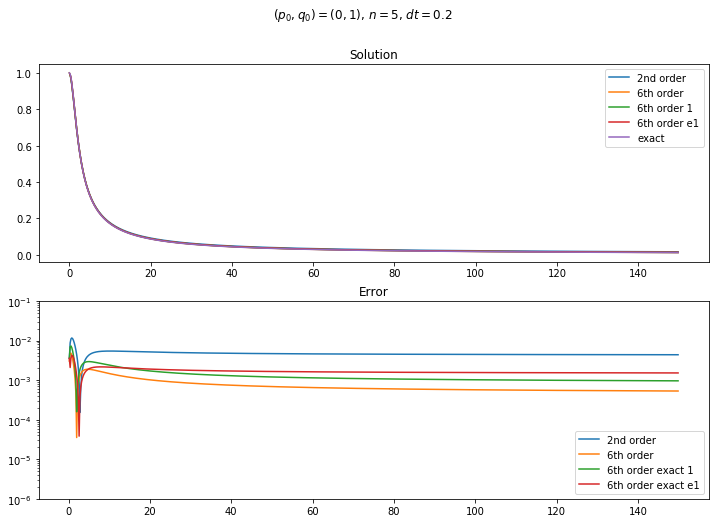

In [19]:
le = LaneEmden(5)
dt = 0.2
tf = 150

tspan = np.arange(0.0, tf, dt)

p0, q0 = (0,1)
exact = lambda t: 1/np.sqrt(1 + t**2/3)

plt.figure(figsize=(12,8))
plt.suptitle(f"$(p_0,q_0)=({p0},{q0})$, $n={le.n}$, $dt={dt}$")

sol, _, _ = ic.integrate(ic.step, le, tspan, p0, q0, 0.0)
solm, _, _ = ic.integrate(ic.step6, le, tspan, p0, q0, 0.0)

sole, _, _ = ic.integrate(ic.step6e, le, tspan, p0, q0, 0.0)
# solb, _, _ = ic.integrate(ic.step6b, le, tspan, p0, q0, 0.0)
# solc, _, _ = ic.integrate(ic.step6c, le, tspan, p0, q0, 0.0)

p1, q1 = sol[:,0][1], sol[:,1][1]
solm1, _, _ = ic.integrate(ic.step6, le, tspan[1:], p1, q1, 0.0)
sole1, _, _ = ic.integrate(ic.step6e, le, tspan[1:], p1, q1, 0.0)

# solrk = rk4(le, (p0, q0), tspan)
# solsc, _, _ = ic.integrate(ic.variational_step, le, tspan, p0, q0, 0.0)

plt.subplot(211)
plt.title("Solution")
plt.plot(tspan, 
         sol[:,1],
         label="2nd order")
plt.plot(tspan,
         solm[:,1],
         label="6th order")
plt.plot(tspan[1:],
         solm1[:,1],
         label="6th order 1")
plt.plot(tspan[1:],
         sole1[:,1],
         label="6th order e1")
# plt.plot(tspan,
#          sole[:,1],
#          label="6th order exact")
# plt.plot(tspan,
#          solb[:,1],
#          label="6th order b")
# plt.plot(tspan,
#          solc[:,1],
#          label="6th order c")


#     plt.plot(tspan,
#              solsc[:,1],
#              label="V")
plt.plot(tspan, exact(tspan),
         label="exact")
plt.legend()

plt.subplot(212)
plt.title("Error")
plt.plot(tspan[1:], 
         abs(sol[:,1]-exact(tspan))[1:],
         label="2nd order")
plt.plot(tspan[1:],
         abs(solm[:,1]-exact(tspan))[1:],
         label="6th order")
plt.plot(tspan[1:],
         abs(solm1[:,1]-exact(tspan)[1:]),
         label="6th order exact 1")
plt.plot(tspan[1:],
         abs(sole1[:,1]-exact(tspan)[1:]),
         label="6th order exact e1")

# plt.plot(tspan[1:],
#          abs(sole[:,1]-exact(tspan))[1:],
#          label="6th order exact")
# plt.plot(tspan[1:],
#          abs(solb[:,1]-exact(tspan))[1:],
#          label="6th order b")
# plt.plot(tspan[1:],
#          abs(solc[:,1]-exact(tspan))[1:],
#          label="6th order c")
#     plt.plot(tspan,
#              solsc[:,1]-exact(tspan),
#              label="V")
plt.yscale("log")
plt.ylim(1e-6, 1e-1)
plt.legend()
plt.show()


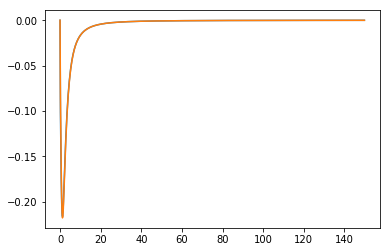

In [20]:
plt.plot(tspan, 
         sol[:,0],
         label="2nd order")
plt.plot(tspan,
         solm[:,0],
         label="6th order")
plt.show()

/Users/mseri/code/contact-integrators/integrators/contact.py:60: RuntimeWarning: invalid value encountered in double_scalars
  s += np.linalg.norm(p)**2*dt/4.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':


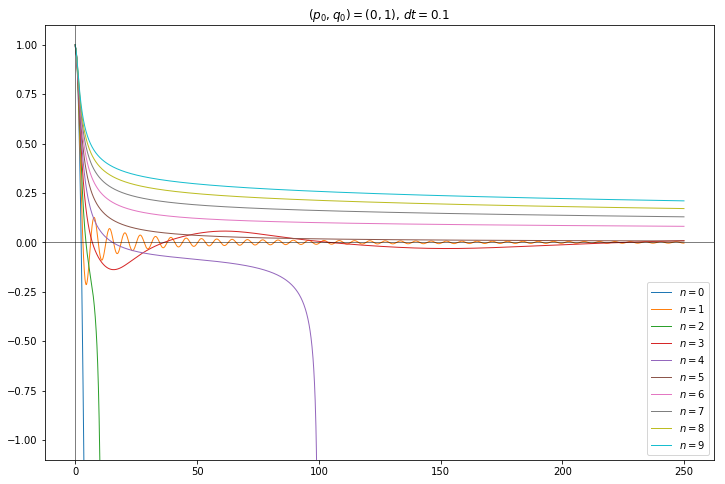

In [7]:
p0, q0 = (0,1)

dt = 0.1
tf = 250

tspan = np.arange(0.0, tf, dt)

plt.figure(figsize=(12,8))
plt.title(f"$(p_0,q_0)=({p0},{q0})$, $dt={dt}$")
    
for i in range(10):
    le = LaneEmden(i)

    solm, _, _ = ic.integrate(ic.step6, le, tspan, p0, q0, 0.0)

    plt.plot(tspan,
             solm[:,1],
             label=f"$n={le.n}$",
             linewidth=1)

plt.ylim(-1.1, 1.1)
plt.axhline(y=0, linewidth=0.5, c='k')
plt.axvline(x=0, linewidth=0.5, c='k')
plt.legend()
plt.show()

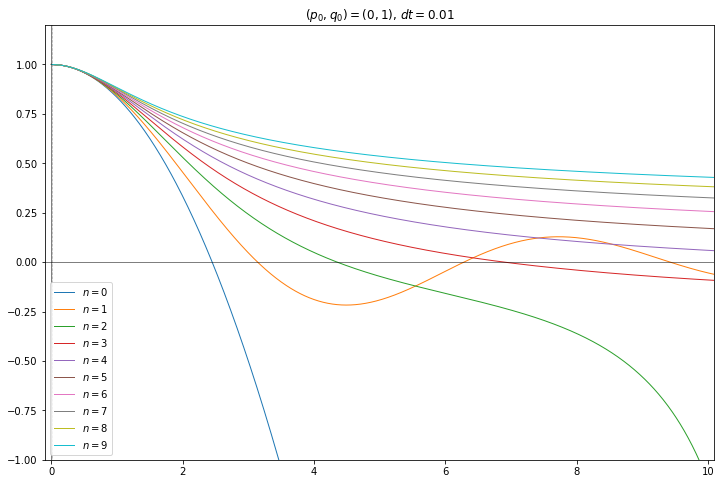

In [8]:
p0, q0 = (0,1)

dt = 0.01
tf = 10.1

tspan = np.arange(0.0, tf, dt)

plt.figure(figsize=(12,8))
plt.title(f"$(p_0,q_0)=({p0},{q0})$, $dt={dt}$")
    
for i in range(10):
    le = LaneEmden(i)

    solm, _, _ = ic.integrate(ic.step6, le, tspan, p0, q0, 0.0)

    plt.plot(tspan,
             solm[:,1],
             label=f"$n={le.n}$",
             linewidth=1)

plt.axhline(y=0, c='k', linewidth=0.5)
plt.axvline(x=0, c='k', linewidth=0.5)
plt.axvline(x=dt, c='k', linewidth=0.5, linestyle=':')
plt.xlim(-0.1,10.1)
plt.ylim(-1,1.2)
plt.legend()
plt.show()